In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('health care diabetes.csv')

Following pointers will be helpful to structure your findings.   

<h3>Project Task Week 1 - Data Exploration</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df = data
x = pd.Series([df[i].value_counts() for i in df.columns], index = df.columns)
y = pd.concat([df.isnull().any(), df.dtypes, x] , axis=1, keys=["IsNull","Type","Values"])
y
#There is no null data skipping imputation step
#df.isnull().sum().sort_values(ascending= False).head(19)

,IsNull,Type,Values
Pregnancies,False,int64,1 135 0 111 2 103 3 75 4 ...
Glucose,False,int64,99 17 100 17 111 14 129 14 125 ...
BloodPressure,False,int64,70 57 74 52 78 45 68 45 72 ...
SkinThickness,False,int64,0 227 32 31 30 27 27 23 23 ...
Insulin,False,int64,0 374 105 11 130 9 140 9 12...
BMI,False,float64,32.0 13 31.6 12 31.2 12 0.0 11 32...
DiabetesPedigreeFunction,False,float64,0.258 6 0.254 6 0.268 5 0.207 5 0....
Age,False,int64,22 72 21 63 25 48 24 46 23 38 2...
Outcome,False,int64,"0 500 1 268 Name: Outcome, dtype: int64"


##  Answer: No Null Values

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


##  Answer: No Duplicate Values

In [7]:
df.shape

(768, 9)

<h2>1. Preliminary Analysis</h2>

<h4>1 a) The shape of the dataset is (768,9). There are 8 features and 1 target variable. There are no missing values and no duplicate row.</h4>


<h2>2. EDA on the data</h2> 

<h4>2 a) Preliminary statistical summary of the data and the measure of central tendencies and spread of the data</h4>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
#categorical_features = (df.select_dtypes(include=['object']).columns.values)
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.values


All these fetaures looks like Numerical data

<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 1440x1152 with 0 Axes>

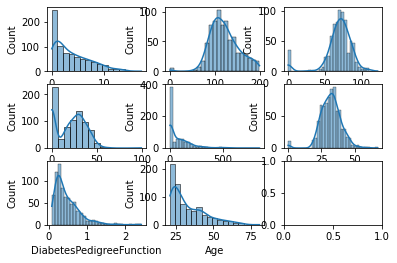

In [10]:
plt.figure(figsize=(20, 16))
fig, ax =plt.subplots(3,3)
sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax[0][0])
sns.histplot(data=df, x="Glucose", kde=True, ax=ax[0][1])
sns.histplot(data=df, x="BloodPressure", kde=True, ax=ax[0][2])
sns.histplot(data=df, x="SkinThickness", kde=True, ax=ax[1][0])
sns.histplot(data=df, x="Insulin", kde=True, ax=ax[1][1])
sns.histplot(data=df, x="BMI", kde=True, ax=ax[1][2])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax[2][0])
sns.histplot(data=df, x="Age", kde=True, ax=ax[2][1])


<AxesSubplot:xlabel='Age', ylabel='count'>

<Figure size 1440x1152 with 0 Axes>

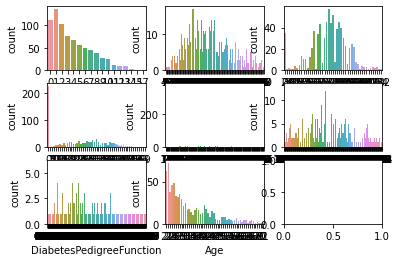

In [11]:
plt.figure(figsize=(20, 16))
fig, ax =plt.subplots(3,3)
sns.countplot(data=df, x="Pregnancies", ax=ax[0][0])
sns.countplot(data=df, x="Glucose", ax=ax[0][1])
sns.countplot(data=df, x="BloodPressure", ax=ax[0][2])
sns.countplot(data=df, x="SkinThickness", ax=ax[1][0])
sns.countplot(data=df, x="Insulin", ax=ax[1][1])
sns.countplot(data=df, x="BMI", ax=ax[1][2])
sns.countplot(data=df, x="DiabetesPedigreeFunction", ax=ax[2][0])
sns.countplot(data=df, x="Age", ax=ax[2][1])


0    500
1    268
Name: Outcome, dtype: int64


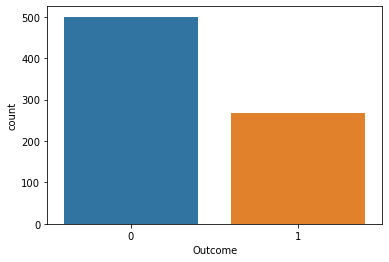

In [12]:
sns.countplot(data=df, x="Outcome")
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

<h1>Project Task Week 2 - Data Exploration</h1>

In [32]:
!pip install imblearn

In [14]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

# Separate the predictor and target variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Count the number of samples for each class
print('Original dataset shape %s' % Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the majority class (0)
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Count the number of samples for each class after undersampling
print('Resampled dataset shape %s' % Counter(y_train_res))


Original dataset shape Counter({0: 500, 1: 268})
Resampled dataset shape Counter({0: 213, 1: 213})


In [15]:
# Concatenate X_train_res and y_train_res side by side
df_resampled = pd.concat([pd.DataFrame(X_train_res), pd.DataFrame(y_train_res)], axis=1)


In [16]:
# Print the first few rows of the resampled dataset
df_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,128,64,42,0,40.0,1.101,24,0
1,0,99,0,0,0,25.0,0.253,22,0
2,2,94,76,18,66,31.6,0.649,23,0
3,3,99,80,11,64,19.3,0.284,30,0
4,0,105,68,22,0,20.0,0.236,22,0


In [17]:
df_resampled.shape

(426, 9)

0    213
1    213
Name: Outcome, dtype: int64


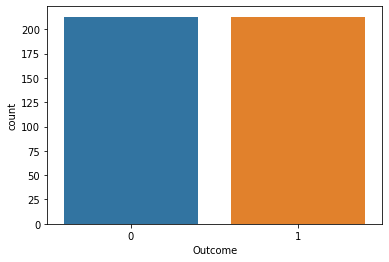

In [18]:
sns.countplot(data=df_resampled, x="Outcome")
outcome_counts = df_resampled['Outcome'].value_counts()
print(outcome_counts)

We chose to do Undersampling to reduce the computational complexity of a model, since it requires fewer samples to train on. 
However, it's important to note that undersampling can also have drawbacks. For example, if the dataset is very imbalanced and the majority class has many important samples, removing them through undersampling could lead to a loss of valuable information. Additionally, undersampling can sometimes lead to overfitting, where the model learns the noise in the data rather than the underlying patterns. Therefore, it's important to carefully evaluate the benefits and drawbacks of undersampling in the context of a specific machine learning problem.

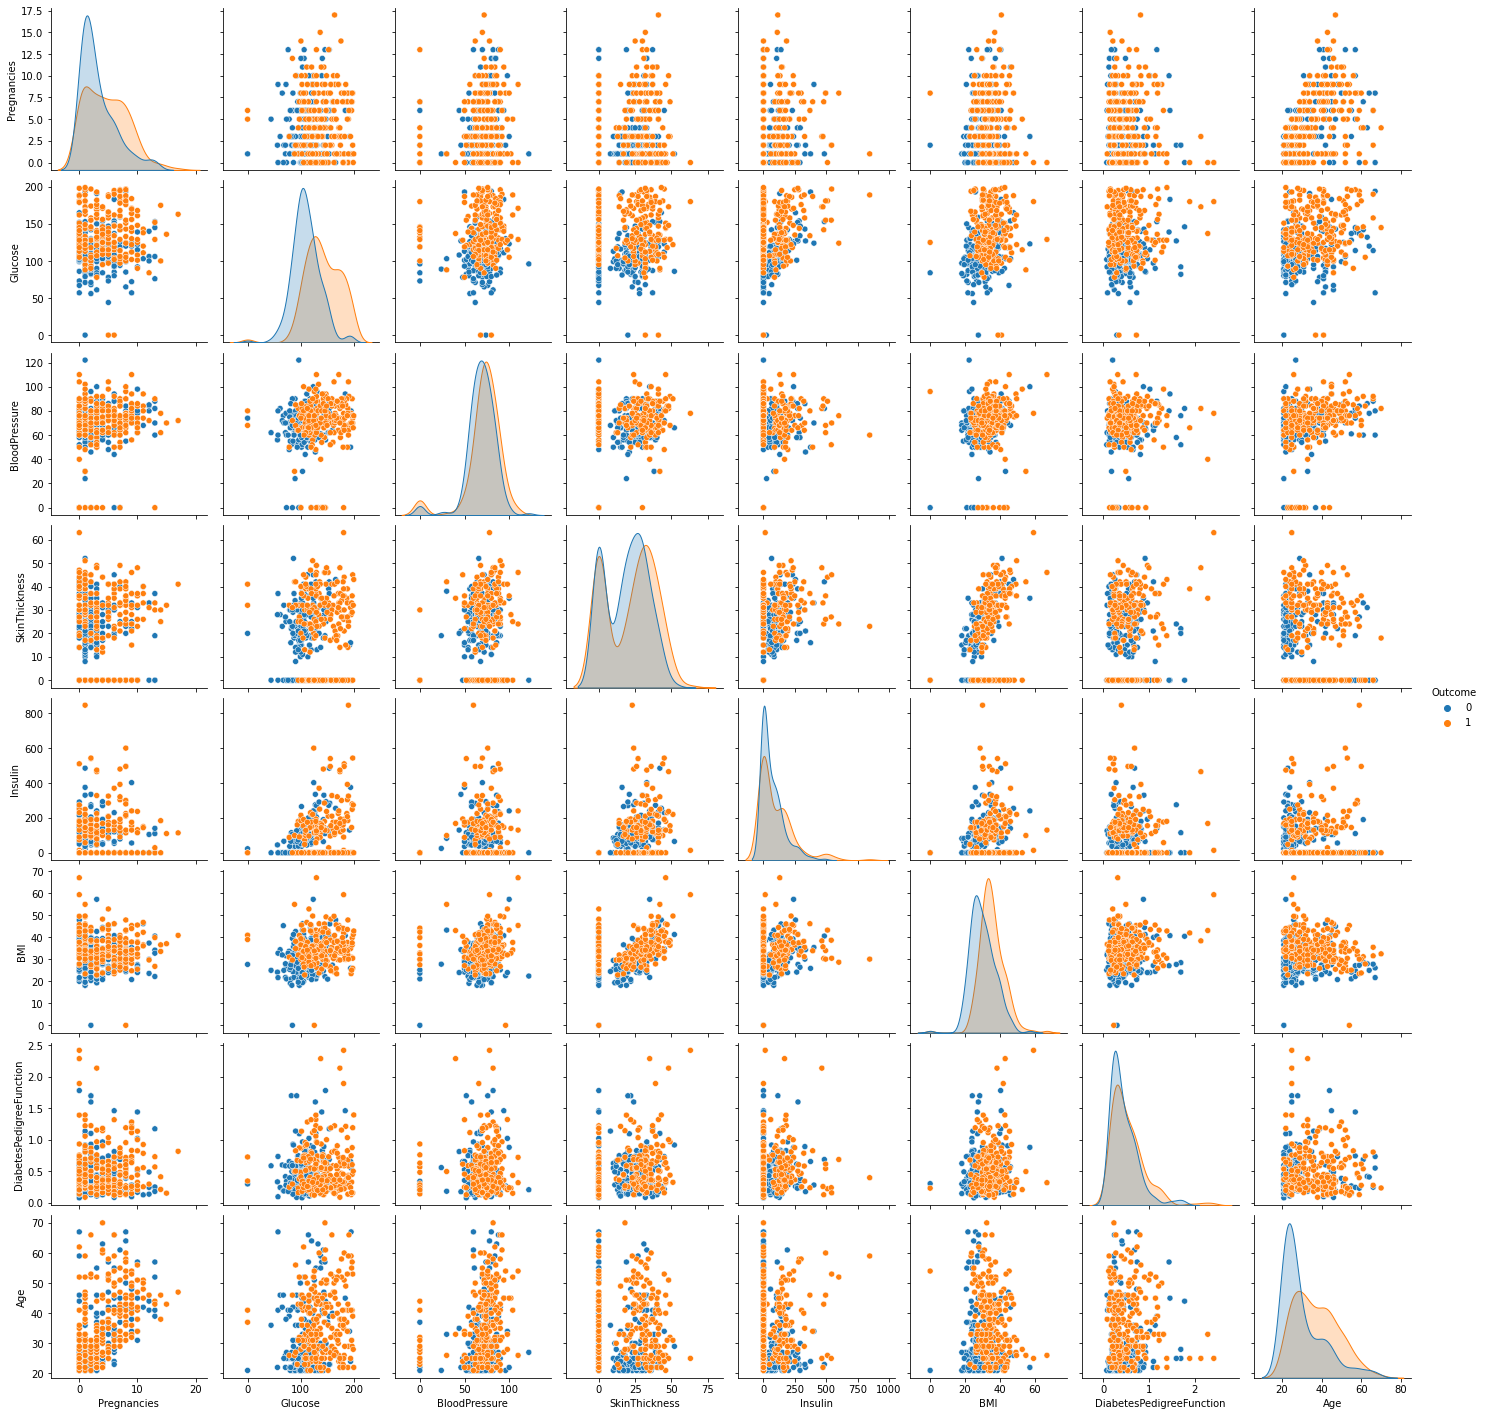

In [19]:
sns.pairplot(data=df_resampled, hue='Outcome')
plt.show()

1. There is a positive linear relationship between Glucose and Outcome, meaning that as Glucose levels increase, the likelihood of having diabetes also increases.
2. There seems to be no clear linear relationship between BloodPressure and Outcome, although there may be some correlation for higher blood pressures.
3. There is a weak positive relationship between SkinThickness and Outcome, indicating that those with higher SkinThickness measurements may be slightly more likely to have diabetes.
4. There is no clear relationship between Insulin and Outcome.
5. There is a positive relationship between BMI and Outcome, indicating that those with higher BMI measurements may be more likely to have diabetes.
6. There is no clear relationship between DiabetesPedigreeFunction and Outcome.
7. There is a positive relationship between Age and Outcome, indicating that older individuals may be more likely to have diabetes.
8. Overall, the pair plot suggests that certain variables, such as Glucose, BMI, and Age, may be more strongly associated with the likelihood of having diabetes than others, such as SkinThickness and Insulin.

<AxesSubplot:>

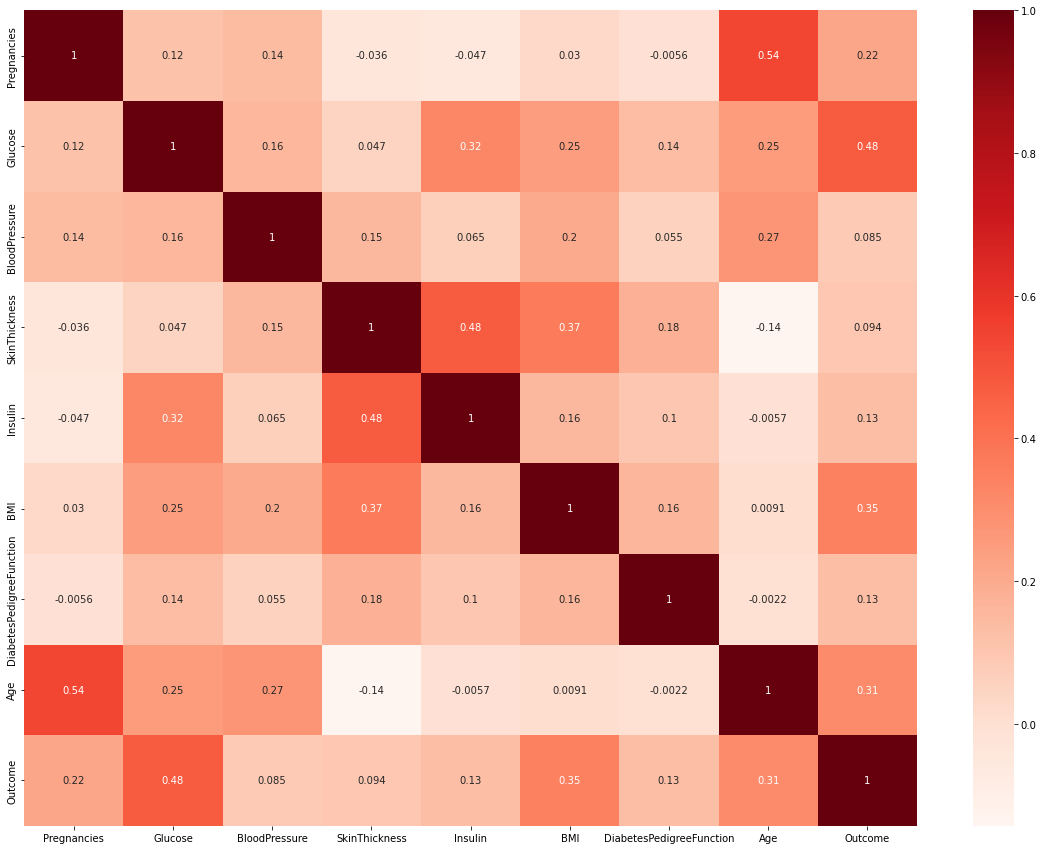

In [20]:
# Correlation analysis and feature selection
corr = df_resampled.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="Reds")

In [21]:
corr_target = abs(corr['Outcome'])
important_features = corr_target[corr_target > 0.3].index.tolist()
important_features.remove('Outcome')
print('Important Features:', important_features)


Important Features: ['Glucose', 'BMI', 'Age']


<h3>Project Task Week 3 - Data Modeling</h3>

Since the dataset is relatively small, we can use k-fold cross-validation to evaluate the performance of the models. 
This involves dividing the dataset into k equal parts, training the model on k-1 parts, and evaluating it on the remaining part. We can repeat this process k times, each time using a different part as the validation set. 
This can help reduce the variance in the model's performance and provide a more accurate estimate of its generalization performance.

In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming X and y are already defined
X = df_resampled.drop('Outcome', axis=1)
y = df_resampled['Outcome']
# Define the k-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Define the classification model
model = LogisticRegression()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy LR: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


from sklearn.tree import DecisionTreeClassifier

# Define the k-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Define the classification model
model = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



from sklearn.ensemble import RandomForestClassifier

# Define the k-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Define the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy RF: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


from sklearn.svm import SVC

# Define the k-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Define the classification model
model = SVC(kernel='linear', random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy SVC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ammar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy LR: 0.76 (+/- 0.02)
Accuracy Decision Tree: 0.71 (+/- 0.03)
Accuracy RF: 0.75 (+/- 0.03)
Accuracy SVC: 0.75 (+/- 0.03)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Define the k-fold cross-validation object
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Define the classification model
model = KNeighborsClassifier(n_neighbors=17)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy KNN: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Accuracy KNN: 0.73 (+/- 0.04)


Logistic regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machines,  has a better accuracy than KNN

<h3>Project Task Week 4 - Data Modeling</h3>

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        49
           1       0.76      0.70      0.73        37

    accuracy                           0.78        86
   macro avg       0.78      0.77      0.77        86
weighted avg       0.78      0.78      0.78        86

AUC-ROC score: 0.848869277440706


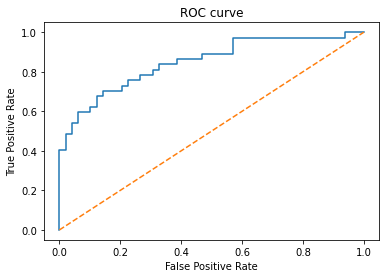

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, roc_auc_score, roc_curve

# Get features and target
X = df_resampled.drop('Outcome', axis=1)
y = df_resampled['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Compute predicted probabilities and convert to binary predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute and print AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC score: {auc_roc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


In this case, we're using a classification threshold of 0.5 to convert the predicted probabilities to binary predictions

Precision measures the accuracy of the positive predictions made by the model. In our case, for predicting diabetes, the precision for class 0 is 0.79, which means that 79% of the predictions for non-diabetic patients were correct. For class 1, the precision is 0.76, which means that 76% of the predictions for diabetic patients were correct.

Recall measures the proportion of actual positives that are correctly identified by the model. For class 0, the recall is 0.84, which means that 84% of the non-diabetic patients were correctly identified by the model. For class 1, the recall is 0.70, which means that 70% of the diabetic patients were correctly identified by the model.

F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.81, and for class 1, it is 0.73.

The support column indicates the number of samples in each class.

In our case, we can see that the AUC score is 0.81, which is a good indication of the overall performance of our model. The ROC curve shows that our model is able to achieve a high TPR with a relatively low FPR, which is desirable for a good classification model.